In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the data
df = pd.read_csv('/Users/saki/Desktop/Assignment1_StreamFlow_Subscription_Data.csv')

In [3]:
#Display the first 5 rows
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [4]:
#info() gives you structural information about the dataset
#Display the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [5]:
#Obtain a statistical summary of the dataframe
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [6]:
# round Monthly_Hours_Watched and Average_Session_Length to 4 decimal palce
df['Average_Session_Length'] = df['Average_Session_Length'].round(4)
df['Monthly_Hours_Watched'] = df['Monthly_Hours_Watched'].round(4)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.5132,Action,PC,1.1958,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.9823,Drama,PC,0.8090,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.1150,Sci-Fi,Tablet,1.1536,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.2448,Action,TV,0.6095,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.7119,Sci-Fi,Mobile,0.3600,1012,4,0,NaN,NaN


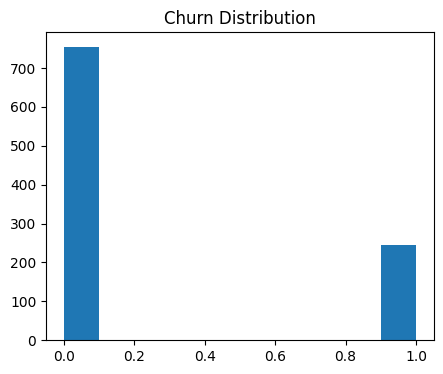

In [7]:
# Visualize the distribution of churn
plt.figure(figsize=(5, 4))
plt.hist(df['Churned'])
plt.title('Churn Distribution')
plt.show()

In [8]:
churn_rate_tot = (df[df['Churned'] == 1]['User_ID'].nunique() / df['User_ID'].nunique()) * 100
churn_rate_tot

24.6

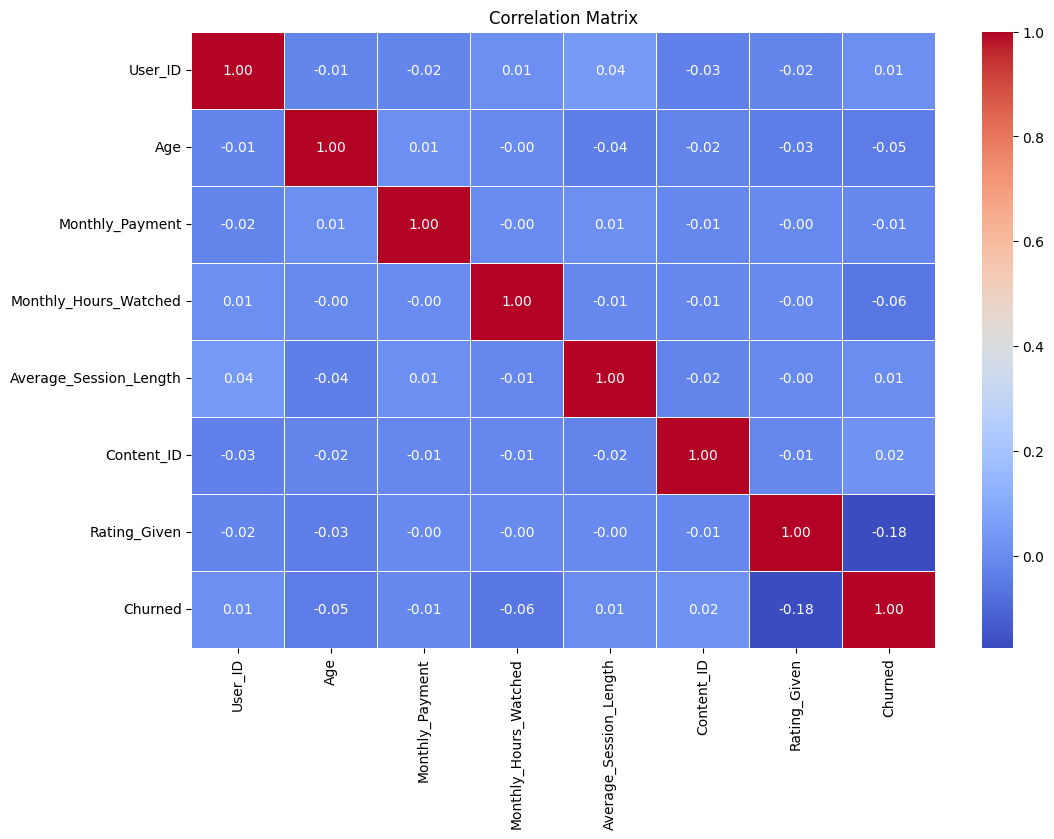

In [9]:
# Correlation matrix
# Ensure the Churned column is numeric
df['Churned'] = df['Churned'].astype(int)

# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

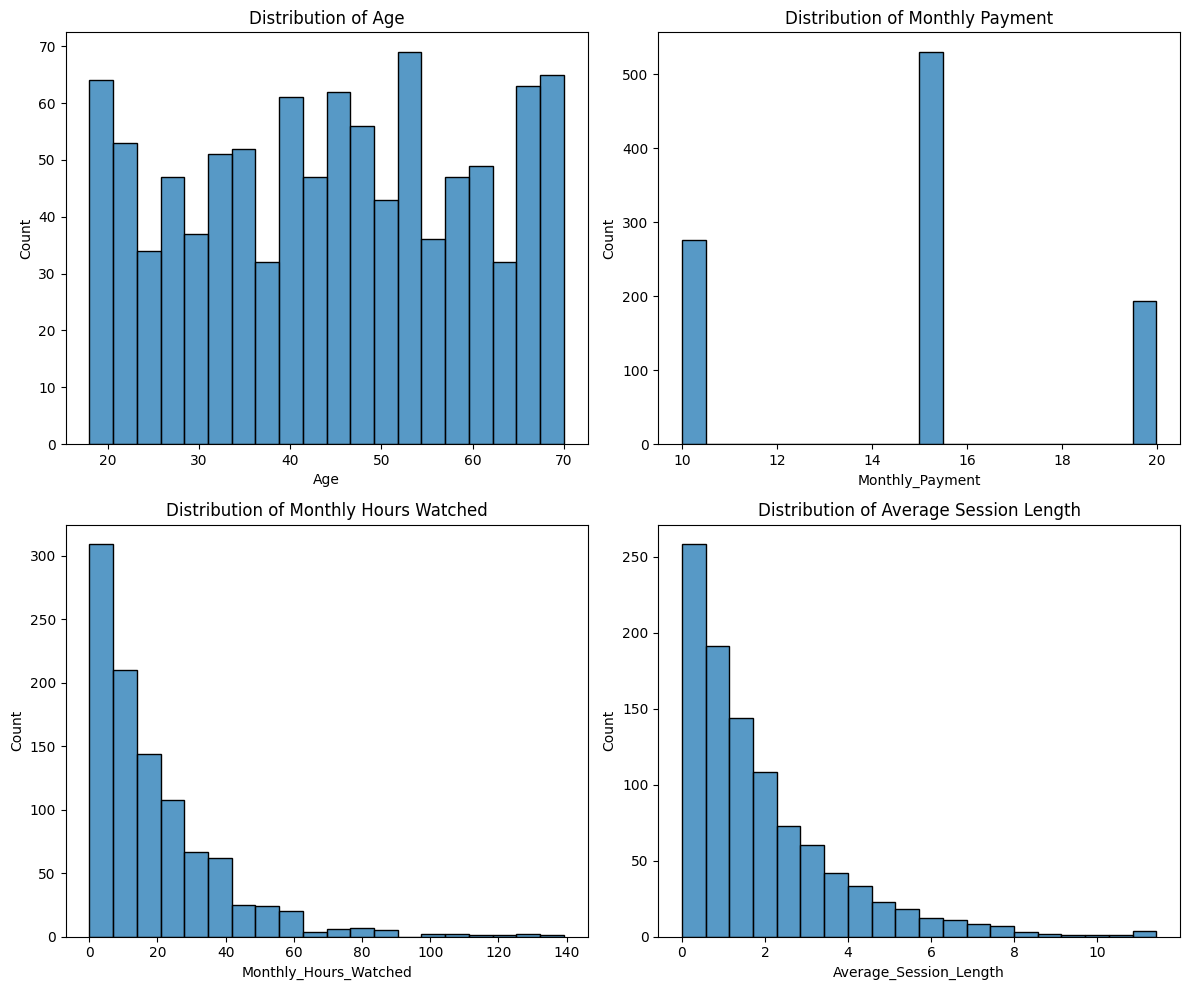

In [10]:
# Histograms for numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], bins=20, ax=axes[0, 0]).set_title('Distribution of Age')
sns.histplot(df['Monthly_Payment'], bins=20, ax=axes[0, 1]).set_title('Distribution of Monthly Payment')
sns.histplot(df['Monthly_Hours_Watched'], bins=20, ax=axes[1, 0]).set_title('Distribution of Monthly Hours Watched')
sns.histplot(df['Average_Session_Length'], bins=20, ax=axes[1, 1]).set_title('Distribution of Average Session Length')

plt.tight_layout()
plt.show()

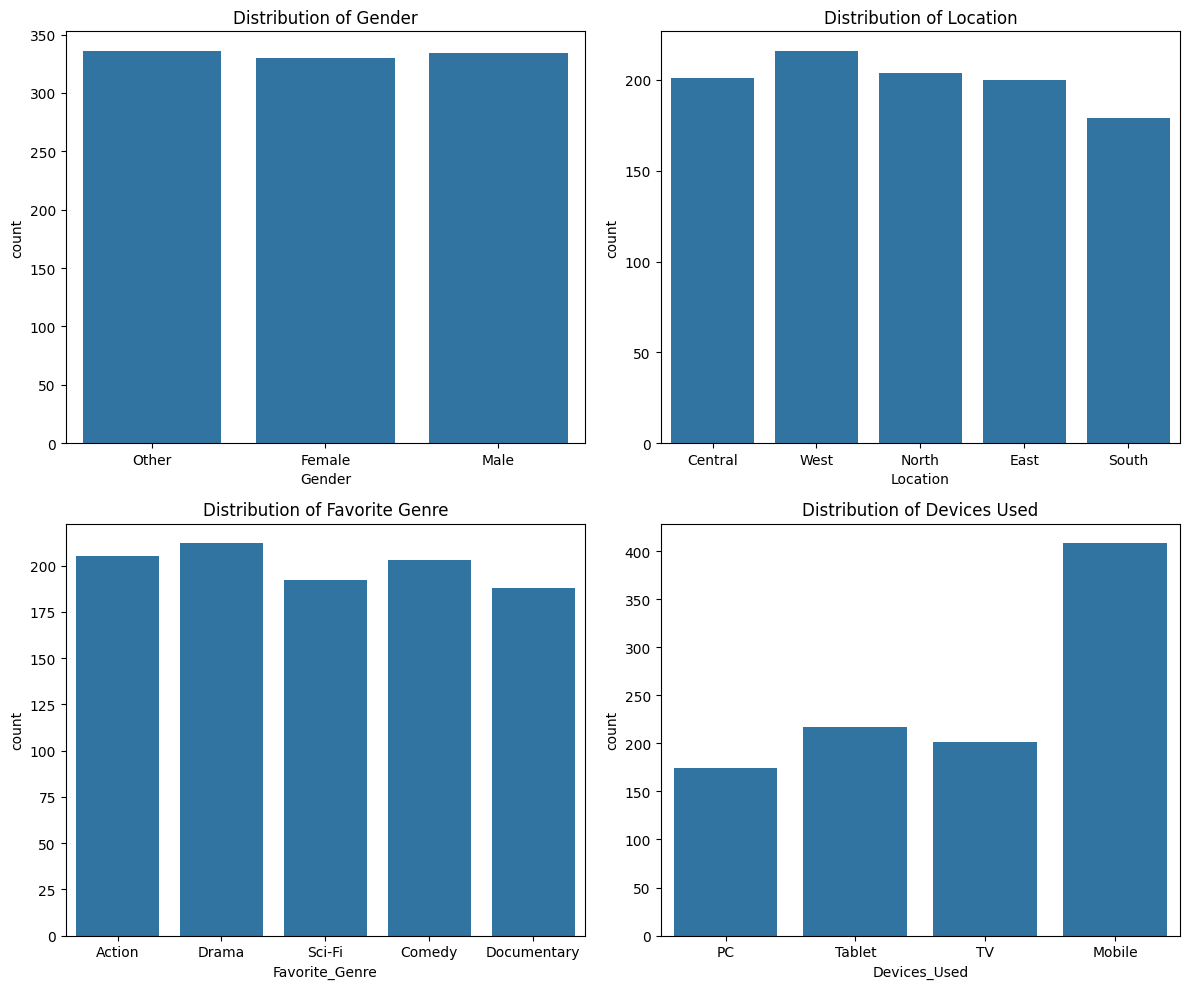

In [11]:
# Bar charts for categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='Gender', data=df, ax=axes[0, 0]).set_title('Distribution of Gender')
sns.countplot(x='Location', data=df, ax=axes[0, 1]).set_title('Distribution of Location')
sns.countplot(x='Favorite_Genre', data=df, ax=axes[1, 0]).set_title('Distribution of Favorite Genre')
sns.countplot(x='Devices_Used', data=df, ax=axes[1, 1]).set_title('Distribution of Devices Used')

plt.tight_layout()
plt.show()

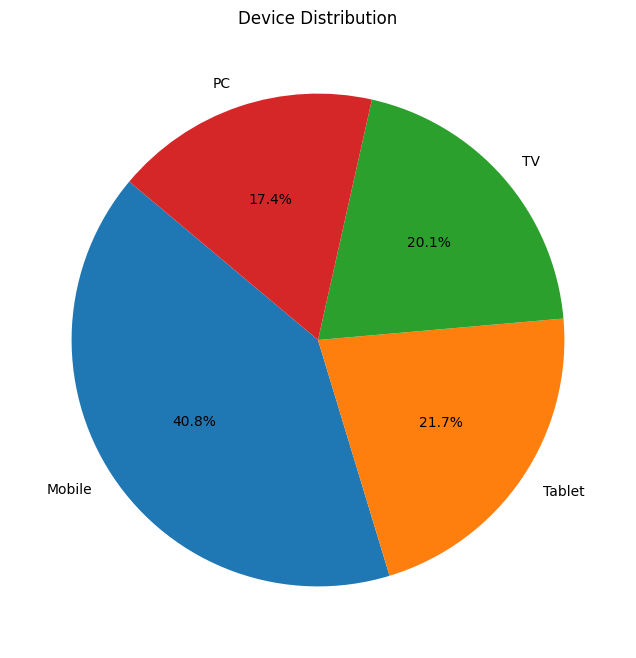

In [12]:


device_counts = df['Devices_Used'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Device Distribution')
plt.show()

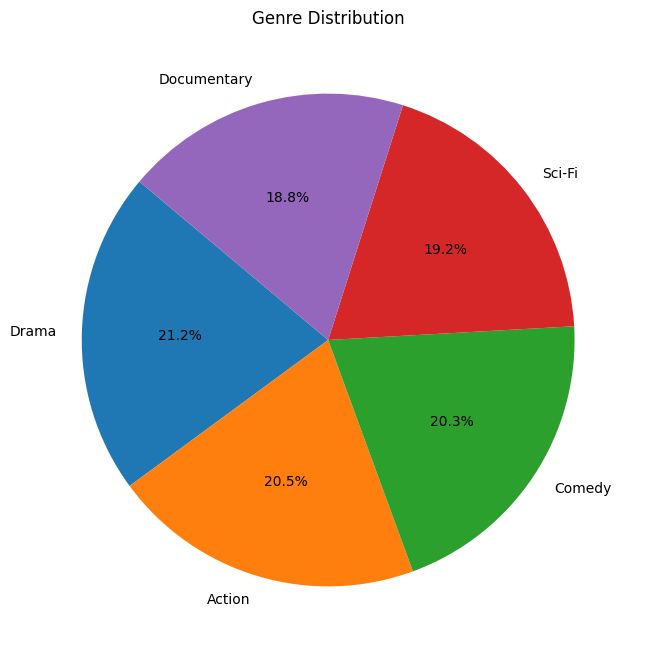

In [13]:
type_counts = df['Favorite_Genre'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.show()

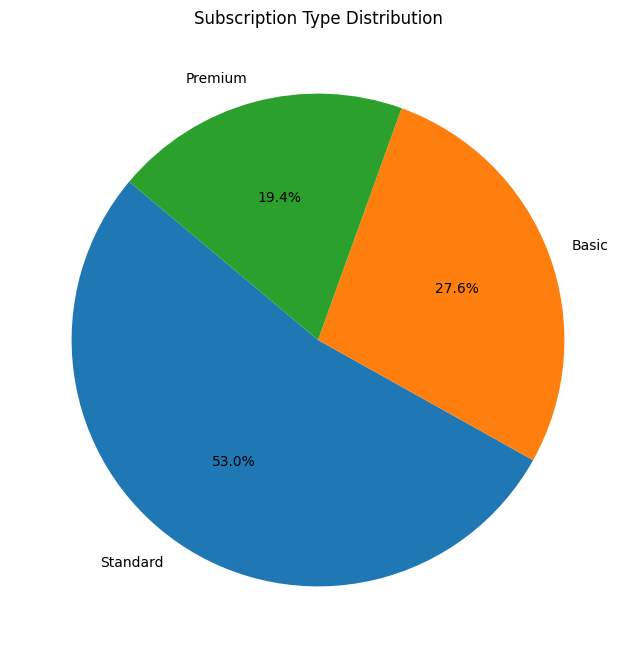

In [14]:
type_counts = df['Subscription_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Type Distribution')
plt.show()

In [15]:
# Calculate churn rate for different device types

# Split the Devices_Used column into multiple device entries (if needed)
df['Devices_Used'] = df['Devices_Used'].str.split(',')

# Explode the devices into separate rows
exploded_df = df.explode('Devices_Used')

# Clean up any leading/trailing whitespace from devices
exploded_df['Devices_Used'] = exploded_df['Devices_Used'].str.strip()

# Calculate the total number of users for each device type
total_users_per_device = exploded_df.groupby('Devices_Used')['User_ID'].nunique()

# Calculate the number of churned users for each device type
churned_users_per_device = exploded_df[exploded_df['Churned'] == 1].groupby('Devices_Used')['User_ID'].nunique()

# Calculate the churn rate for each device type
churn_rate_per_device = (churned_users_per_device / total_users_per_device) * 100

# Display the churn rate for each device type
churn_rate_per_device

Devices_Used
Mobile    32.107843
PC        15.517241
TV        21.890547
Tablet    20.276498
Name: User_ID, dtype: float64

In [16]:
# Calculate churn rate for different favorite genre types
# Calculate the total number of users for each favorite type
total_users_per_genre = df.groupby('Favorite_Genre')['User_ID'].nunique()

# Calculate the number of churned users for each favorite type
churned_users_per_genre = df[df['Churned'] == 1].groupby('Favorite_Genre')['User_ID'].nunique()

# Calculate the churn rate for each favorite type
churn_rate_per_genre = (churned_users_per_genre / total_users_per_genre) * 100

# Display the churn rate for each favorite type
print(churn_rate_per_genre)


Favorite_Genre
Action         23.902439
Comedy         24.137931
Documentary    27.659574
Drama          22.169811
Sci-Fi         25.520833
Name: User_ID, dtype: float64


In [17]:
# Calculate churn rate for different Subscription types
# Calculate the total number of users for each Subscription type
total_users_per_sub = df.groupby('Subscription_Type')['User_ID'].nunique()

# Calculate the number of churned users for each Subscription type
churned_users_per_sub = df[df['Churned'] == 1].groupby('Subscription_Type')['User_ID'].nunique()

# Calculate the churn rate for each Subscription type
churn_rate_per_sub = (churned_users_per_sub / total_users_per_sub) * 100

# Display the churn rate for each Subscription type
print(churn_rate_per_sub)

Subscription_Type
Basic       26.449275
Premium     25.257732
Standard    23.396226
Name: User_ID, dtype: float64


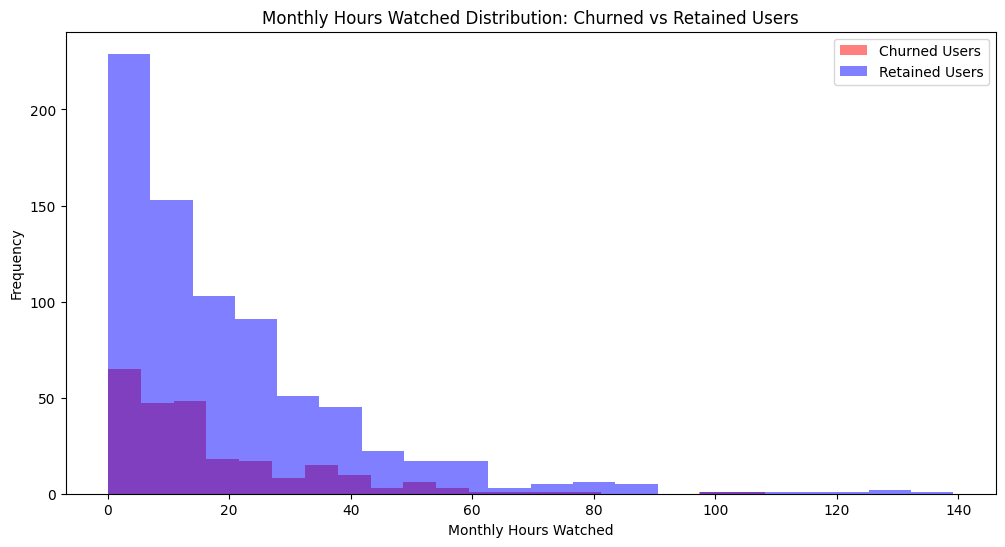

In [18]:
# Separate churned and retained users
churned_users = df[df['Churned'] == 1]
retained_users = df[df['Churned'] == 0]

# Plot histograms for Monthly_Hours_Watched for churned and retained users on the same plot
plt.figure(figsize=(12, 6))
plt.hist(churned_users['Monthly_Hours_Watched'], bins=20, alpha=0.5, label='Churned Users', color='red')
plt.hist(retained_users['Monthly_Hours_Watched'], bins=20, alpha=0.5, label='Retained Users', color='blue')
plt.xlabel('Monthly Hours Watched')
plt.ylabel('Frequency')
plt.title('Monthly Hours Watched Distribution: Churned vs Retained Users')
plt.legend(loc='upper right')
plt.show()